# Import libraries

In [22]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from random import shuffle
import random

In [23]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Define constants & methods

In [24]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "version_name = " + "'"+attribs['data-notebook-name'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [25]:
version_name = version_name.split('.')[0]

In [26]:
save_model_path = "/home/sch17/Documents/fyp/notebooks/xception/output/"+version_name
save_history_path = "/home/sch17/Documents/fyp/notebooks/xception/output/"+version_name

In [27]:
save_history_path

'/home/sch17/Documents/fyp/notebooks/xception/output/xception_V2_kcross'

In [28]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [29]:
# plot graphs for training and valdation data
def plot_graphs(history):
  acc = [0.] + history.history['accuracy']
  val_acc = [0.] + history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc,'o-g', label='Training Accuracy')
  plt.plot(val_acc, 'o-r',label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, 'o-g', label='Training Loss')
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,3.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

In [30]:
# get accuray of test data
def getModelAccuracy(dataframe):
    sample_test = dataframe
    correctPredictions = 0

    correctNormalPred = 0
    correctCovidPred = 0
    correctPneumoniaPred = 0

    totalNormalPred = 0
    totalCovidPred = 0
    totalPneumoniaPred = 0

    for index, row in sample_test.iterrows():

        filename = row['filename']
        prediction = row['category']

        # img = load_img(path + 'CrossValidationDataset\\' + filename, target_size=IMAGE_SIZE)

        if (path +'/normal') in filename:

            if prediction == 0:
                correctPredictions += 1
                correctNormalPred += 1

            totalNormalPred += 1

        if (path + '/covid') in filename:

            if prediction == 1: 
                correctPredictions += 1
                correctCovidPred += 1

            totalCovidPred += 1

        if (path + '/pneumonia') in filename:

            if prediction == 2: 
                correctPredictions += 1
                correctPneumoniaPred += 1

            totalPneumoniaPred += 1
            
    print('Model Accuracy:', "{:.2%}".format(correctPredictions / test_df.shape[0]))
    print('Correct Predictions:', correctPredictions, 'Total Predictions:', test_df.shape[0])

    print('\nNormal Predictions:', correctNormalPred, 'Accuracy', "{:.2%}".format(correctNormalPred /  totalNormalPred))
    print('Covid Predictions:', correctCovidPred, 'Accuracy', "{:.2%}".format(correctCovidPred /  totalCovidPred))
    print('Pneumonia Predictions:', correctPneumoniaPred, 'Accuracy', "{:.2%}".format(correctPneumoniaPred / totalPneumoniaPred))
    
    return (correctPredictions / test_df.shape[0]) * 100

In [31]:
# plot confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools

# np_config.enable_numpy_behavior()
    
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    # thresh = np.max(cm) / 1.5 if normalize else np.max(cm) / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    



In [32]:
path = "/home/sch17/Documents/fyp/dataset"

# Model






In [33]:
def CNNModel():
  init_model = tf.keras.applications.xception.Xception(include_top=False, input_shape=input_shape)
  x = init_model.output
  x = tfl.GlobalAveragePooling2D()(x)
  x = tfl.Dropout(0.2)(x)
  x = tfl.Dense(3, activation='softmax')(x) # 3 units
  new_model = Model(inputs=init_model.input, outputs=x)
  # without freezing layers - without getting pre-trained parameters

  return new_model

In [13]:
test_model = CNNModel()

In [14]:
test_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

# Create dataframe

In [34]:
directories = ['/normal']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(0)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_NORMAL = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_NORMAL.shape[0])
df_NORMAL.head()

directories = ['/pneumonia']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(2)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_PNEUMONIA = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_PNEUMONIA.shape[0])
df_PNEUMONIA.head()

directories = ['/covid']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(1)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_COVID = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_COVID.shape[0])
df_COVID.head()


1583
4273
3616


,filename,category
0,/home/sch17/Documents/fyp/dataset/covid/COVID-321.png,1
1,/home/sch17/Documents/fyp/dataset/covid/COVID-1605.png,1
2,/home/sch17/Documents/fyp/dataset/covid/COVID-1796.png,1
3,/home/sch17/Documents/fyp/dataset/covid/COVID-407.png,1
4,/home/sch17/Documents/fyp/dataset/covid/COVID-191.png,1


In [35]:
pd.options.display.max_colwidth = 100

In [36]:
df = pd.concat([df_NORMAL, df_PNEUMONIA, df_COVID])


In [37]:
# shuffle data
df = df.sample(frac=1).reset_index(drop = True)
df

,filename,category
0,/home/sch17/Documents/fyp/dataset/pneumonia/person481_bacteria_2042.jpeg,2
1,/home/sch17/Documents/fyp/dataset/pneumonia/person71_bacteria_349.jpeg,2
2,/home/sch17/Documents/fyp/dataset/pneumonia/person515_bacteria_2187.jpeg,2
3,/home/sch17/Documents/fyp/dataset/pneumonia/person582_bacteria_2405.jpeg,2
4,/home/sch17/Documents/fyp/dataset/covid/COVID-1947.png,1
...,...,...
9467,/home/sch17/Documents/fyp/dataset/covid/COVID-3421.png,1
9468,/home/sch17/Documents/fyp/dataset/pneumonia/person340_bacteria_1575.jpeg,2
9469,/home/sch17/Documents/fyp/dataset/pneumonia/person1343_bacteria_3419.jpeg,2
9470,/home/sch17/Documents/fyp/dataset/covid/COVID-1434.png,1


<AxesSubplot:>

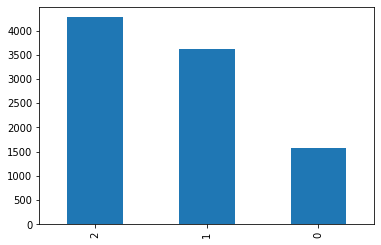

In [38]:
df['category'].value_counts().plot.bar()

train/val/test split - 60% | 20% | 20%

# K cross

Found 5682 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
178/178 [==============================] - 952s 5s/step - loss: 0.1438 - accuracy: 0.9579 - val_loss: 0.1848 - val_accuracy: 0.9441

Epoch 00001: val_loss improved from inf to 0.18479, saving model to /home/sch17/Documents/fyp/notebooks/xception/output/xception_V2_kcross_0.h5


/home/sch17/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/15
178/178 [==============================] - 937s 5s/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.0930 - val_accuracy: 0.9726

Epoch 00002: val_loss improved from 0.18479 to 0.09297, saving model to /home/sch17/Documents/fyp/notebooks/xception/output/xception_V2_kcross_0.h5
Epoch 3/15
178/178 [==============================] - 936s 5s/step - loss: 0.0432 - accuracy: 0.9838 - val_loss: 0.1018 - val_accuracy: 0.9736

Epoch 00003: val_loss did not improve from 0.09297
Epoch 4/15
178/178 [==============================] - 937s 5s/step - loss: 0.0332 - accuracy: 0.9886 - val_loss: 0.1090 - val_accuracy: 0.9757

Epoch 00004: val_loss did not improve from 0.09297
Epoch 5/15
178/178 [==============================] - 937s 5s/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.1277 - val_accuracy: 0.9768

Epoch 00005: val_loss did not improve from 0.09297
Epoch 6/15
178/178 [==============================] - 938s 5s/step - loss: 0.0205 - accuracy: 0.9942 - val_loss: 0.0927 - v

<ipython-input-29-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


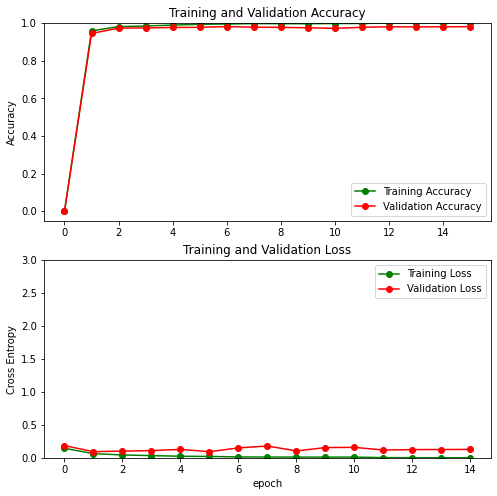

Found 1895 validated image filenames.
Model Accuracy: 98.73%
Correct Predictions: 1871 Total Predictions: 1895

Normal Predictions: 311 Accuracy 96.58%
Covid Predictions: 697 Accuracy 99.86%
Pneumonia Predictions: 863 Accuracy 98.63%


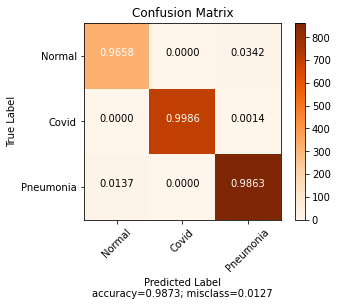

              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96       322
       Covid       1.00      1.00      1.00       698
   Pneumonia       0.99      0.99      0.99       875

    accuracy                           0.99      1895
   macro avg       0.98      0.98      0.98      1895
weighted avg       0.99      0.99      0.99      1895

Precision: 0.9830446704997788
Recall: 0.9835638529486791
F1 : 0.9833033178929652
[[311   0  11]
 [  0 697   1]
 [ 12   0 863]]
Found 5682 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/15
178/178 [==============================] - 942s 5s/step - loss: 0.1464 - accuracy: 0.9528 - val_loss: 0.1394 - val_accuracy: 0.9541

Epoch 00001: val_loss improved from inf to 0.13936, saving model to /home/sch17/Documents/fyp/notebooks/xception/output/xception_

/home/sch17/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/15
178/178 [==============================] - 935s 5s/step - loss: 0.0634 - accuracy: 0.9791 - val_loss: 0.1064 - val_accuracy: 0.9710

Epoch 00002: val_loss improved from 0.13936 to 0.10637, saving model to /home/sch17/Documents/fyp/notebooks/xception/output/xception_V2_kcross_0.h5
Epoch 3/15
178/178 [==============================] - 935s 5s/step - loss: 0.0399 - accuracy: 0.9868 - val_loss: 0.1245 - val_accuracy: 0.9615

Epoch 00003: val_loss did not improve from 0.10637
Epoch 4/15
178/178 [==============================] - 934s 5s/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.1098 - val_accuracy: 0.9773

Epoch 00004: val_loss did not improve from 0.10637
Epoch 5/15
178/178 [==============================] - 934s 5s/step - loss: 0.0290 - accuracy: 0.9894 - val_loss: 0.0813 - val_accuracy: 0.9789

Epoch 00005: val_loss improved from 0.10637 to 0.08127, saving model to /home/sch17/Documents/fyp/notebooks/xception/output/xception_V2_kcross_0.h5
Epoch 6/15
178/178 [======

<ipython-input-29-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


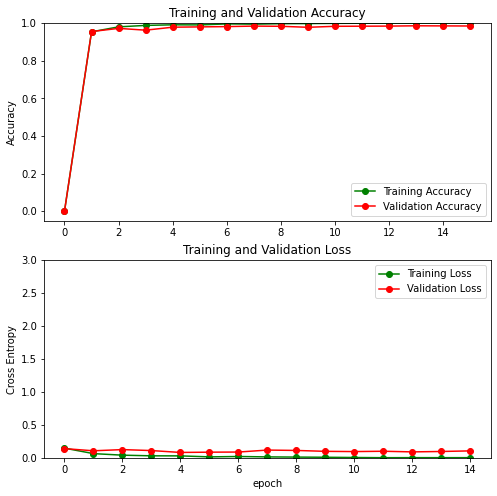

Found 1895 validated image filenames.
Model Accuracy: 98.73%
Correct Predictions: 1871 Total Predictions: 1895

Normal Predictions: 295 Accuracy 96.72%
Covid Predictions: 746 Accuracy 99.87%
Pneumonia Predictions: 830 Accuracy 98.46%


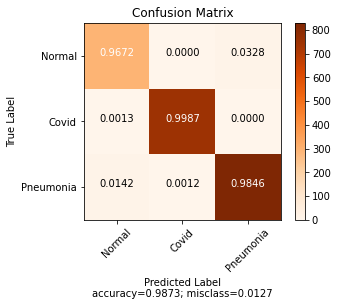

              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96       305
       Covid       1.00      1.00      1.00       747
   Pneumonia       0.99      0.98      0.99       843

    accuracy                           0.99      1895
   macro avg       0.98      0.98      0.98      1895
weighted avg       0.99      0.99      0.99      1895

Precision: 0.98151625260059
Recall: 0.9834844372010597
F1 : 0.9824916159691978
[[295   0  10]
 [  1 746   0]
 [ 12   1 830]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/15
178/178 [==============================] - 941s 5s/step - loss: 0.1365 - accuracy: 0.9539 - val_loss: 0.1245 - val_accuracy: 0.9615

Epoch 00001: val_loss improved from inf to 0.12452, saving model to /home/sch17/Documents/fyp/notebooks/xception/output/xception_V2

/home/sch17/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/15
178/178 [==============================] - 934s 5s/step - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0.2238 - val_accuracy: 0.9462

Epoch 00002: val_loss did not improve from 0.12452
Epoch 3/15
178/178 [==============================] - 935s 5s/step - loss: 0.0390 - accuracy: 0.9866 - val_loss: 0.1532 - val_accuracy: 0.9646

Epoch 00003: val_loss did not improve from 0.12452
Epoch 4/15
178/178 [==============================] - 934s 5s/step - loss: 0.0312 - accuracy: 0.9879 - val_loss: 0.1126 - val_accuracy: 0.9768

Epoch 00004: val_loss improved from 0.12452 to 0.11260, saving model to /home/sch17/Documents/fyp/notebooks/xception/output/xception_V2_kcross_0.h5
Epoch 5/15
178/178 [==============================] - 932s 5s/step - loss: 0.0214 - accuracy: 0.9919 - val_loss: 0.1313 - val_accuracy: 0.9736

Epoch 00005: val_loss did not improve from 0.11260
Epoch 6/15
178/178 [==============================] - 932s 5s/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.1250 - v

<ipython-input-29-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


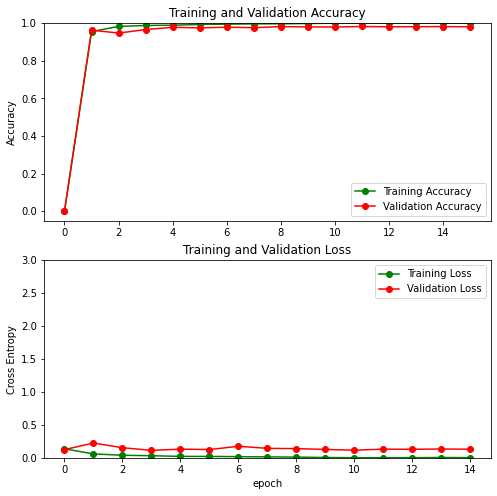

Found 1894 validated image filenames.
Model Accuracy: 98.26%
Correct Predictions: 1861 Total Predictions: 1894

Normal Predictions: 301 Accuracy 97.10%
Covid Predictions: 729 Accuracy 99.45%
Pneumonia Predictions: 831 Accuracy 97.65%


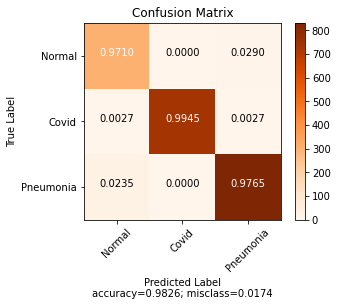

              precision    recall  f1-score   support

      Normal       0.93      0.97      0.95       310
       Covid       1.00      0.99      1.00       733
   Pneumonia       0.99      0.98      0.98       851

    accuracy                           0.98      1894
   macro avg       0.97      0.98      0.98      1894
weighted avg       0.98      0.98      0.98      1894

Precision: 0.9729414706250047
Recall: 0.9806696511274712
F1 : 0.9766600623490099
[[301   0   9]
 [  2 729   2]
 [ 20   0 831]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/15
178/178 [==============================] - 939s 5s/step - loss: 0.1342 - accuracy: 0.9590 - val_loss: 0.1111 - val_accuracy: 0.9530

Epoch 00001: val_loss improved from inf to 0.11105, saving model to /home/sch17/Documents/fyp/notebooks/xception/output/xception_

/home/sch17/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/15
178/178 [==============================] - 931s 5s/step - loss: 0.0603 - accuracy: 0.9803 - val_loss: 0.0672 - val_accuracy: 0.9731

Epoch 00002: val_loss improved from 0.11105 to 0.06720, saving model to /home/sch17/Documents/fyp/notebooks/xception/output/xception_V2_kcross_0.h5
Epoch 3/15
178/178 [==============================] - 931s 5s/step - loss: 0.0412 - accuracy: 0.9845 - val_loss: 0.0960 - val_accuracy: 0.9789

Epoch 00003: val_loss did not improve from 0.06720
Epoch 4/15
178/178 [==============================] - 931s 5s/step - loss: 0.0286 - accuracy: 0.9896 - val_loss: 0.2471 - val_accuracy: 0.9594

Epoch 00004: val_loss did not improve from 0.06720
Epoch 5/15
178/178 [==============================] - 932s 5s/step - loss: 0.0259 - accuracy: 0.9905 - val_loss: 0.1320 - val_accuracy: 0.9699

Epoch 00005: val_loss did not improve from 0.06720
Epoch 6/15
178/178 [==============================] - 931s 5s/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0896 - v

<ipython-input-29-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


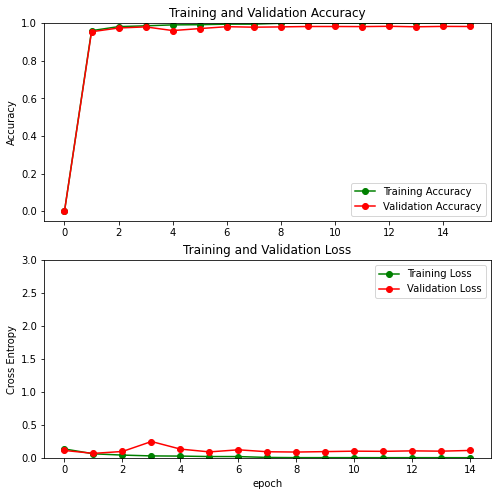

Found 1894 validated image filenames.
Model Accuracy: 98.20%
Correct Predictions: 1860 Total Predictions: 1894

Normal Predictions: 306 Accuracy 96.23%
Covid Predictions: 732 Accuracy 99.59%
Pneumonia Predictions: 822 Accuracy 97.74%


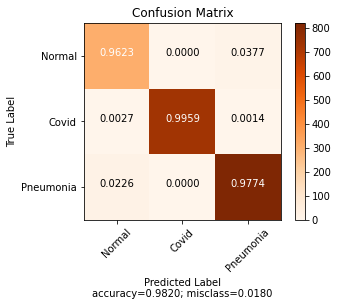

              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95       318
       Covid       1.00      1.00      1.00       735
   Pneumonia       0.98      0.98      0.98       841

    accuracy                           0.98      1894
   macro avg       0.97      0.98      0.98      1894
weighted avg       0.98      0.98      0.98      1894

Precision: 0.9734036514127707
Recall: 0.978530122030191
F1 : 0.9758997135894415
[[306   0  12]
 [  2 732   1]
 [ 19   0 822]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/15
178/178 [==============================] - 940s 5s/step - loss: 0.1513 - accuracy: 0.9516 - val_loss: 0.1103 - val_accuracy: 0.9594

Epoch 00001: val_loss improved from inf to 0.11029, saving model to /home/sch17/Documents/fyp/notebooks/xception/output/xception_V

/home/sch17/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/15
178/178 [==============================] - 933s 5s/step - loss: 0.0656 - accuracy: 0.9778 - val_loss: 0.0723 - val_accuracy: 0.9815

Epoch 00002: val_loss improved from 0.11029 to 0.07234, saving model to /home/sch17/Documents/fyp/notebooks/xception/output/xception_V2_kcross_0.h5
Epoch 3/15
178/178 [==============================] - 933s 5s/step - loss: 0.0438 - accuracy: 0.9838 - val_loss: 0.0727 - val_accuracy: 0.9815

Epoch 00003: val_loss did not improve from 0.07234
Epoch 4/15
178/178 [==============================] - 934s 5s/step - loss: 0.0265 - accuracy: 0.9907 - val_loss: 0.0815 - val_accuracy: 0.9773

Epoch 00004: val_loss did not improve from 0.07234
Epoch 5/15
178/178 [==============================] - 933s 5s/step - loss: 0.0224 - accuracy: 0.9928 - val_loss: 0.1065 - val_accuracy: 0.9747

Epoch 00005: val_loss did not improve from 0.07234
Epoch 6/15
178/178 [==============================] - 936s 5s/step - loss: 0.0203 - accuracy: 0.9916 - val_loss: 0.0692 - v

<ipython-input-29-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


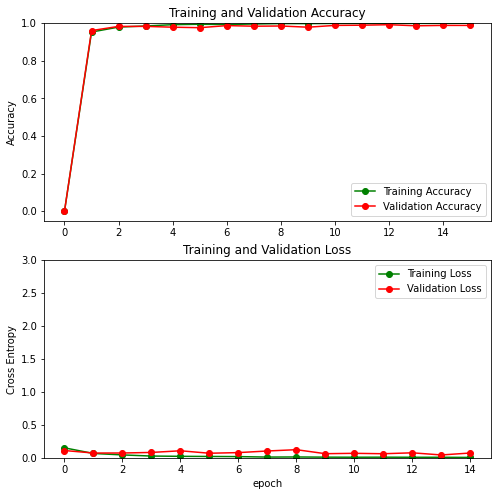

Found 1894 validated image filenames.
Model Accuracy: 98.05%
Correct Predictions: 1857 Total Predictions: 1894

Normal Predictions: 320 Accuracy 97.56%
Covid Predictions: 696 Accuracy 99.00%
Pneumonia Predictions: 841 Accuracy 97.45%


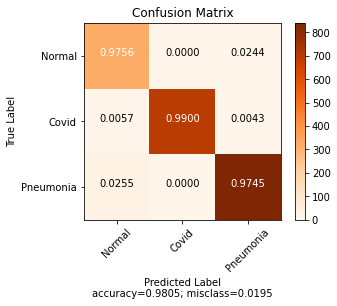

              precision    recall  f1-score   support

      Normal       0.92      0.98      0.95       328
       Covid       1.00      0.99      0.99       703
   Pneumonia       0.99      0.97      0.98       863

    accuracy                           0.98      1894
   macro avg       0.97      0.98      0.98      1894
weighted avg       0.98      0.98      0.98      1894

Precision: 0.9706482310691381
Recall: 0.9800533207387824
F1 : 0.9751031132179099
[[320   0   8]
 [  4 696   3]
 [ 22   0 841]]
[98.7335092348285, 98.7335092348285, 98.25765575501583, 98.20485744456178, 98.04646251319957]
average accuracy =  98.39519883648684


In [39]:
from sklearn.model_selection import KFold

fold_no = 1
batch_size = 32
epochs = 15

acc_per_fold = []
perf_per_fold = []

inputs = df['filename']
targets = df['category']

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)
i = 0

for train, test in kfold.split(inputs, targets):
  init_model = tf.keras.applications.xception.Xception(include_top=False, input_shape=input_shape)
  x = init_model.output
  x = tfl.GlobalAveragePooling2D()(x)
  x = tfl.Dropout(0.2)(x)
  x = tfl.Dense(3, activation='softmax')(x) # 3 units
  model = Model(inputs=init_model.input, outputs=x)

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate= 0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
  
  ##Separate Training Data
  categories = []
  
  for img in inputs[train]:

      fileName = img.split('.')[0]

      if 'normal' in fileName: categories.append(0)
      elif 'covid' in fileName: categories.append(1)
      else: categories.append(2)

  cross_val_df = pd.DataFrame ({
      'filename': inputs[train],
      'category': categories
  })
  
  cross_val_df["category"] = cross_val_df["category"].replace({0: 'Normal', 1: 'Covid', 2:'Pneumonia'})
  
  train_df, validate_df = train_test_split(cross_val_df, test_size=0.25)
  train_df = train_df.reset_index(drop=True)
  validate_df = validate_df.reset_index(drop=True)

  train_generator = ImageDataGenerator(
      preprocessing_function = tf.keras.applications.xception.preprocess_input,
      width_shift_range = 0.1,
      height_shift_range = 0.1
      ).flow_from_dataframe (
        train_df, 
        x_col = 'filename',
        y_col = 'category',
        target_size = IMAGE_SIZE,
        class_mode = 'categorical',
        batch_size = batch_size
    )
  
  validation_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.xception.preprocess_input).flow_from_dataframe (
        validate_df, 
        x_col ='filename',
        y_col = 'category',
        target_size = IMAGE_SIZE,
        class_mode = 'categorical',
        batch_size = batch_size
    )
  
  
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  
  model_checkpoint = ModelCheckpoint(save_model_path + '_' + str(i) +".h5", save_best_only=True, verbose=1)
  reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)

  history = model.fit(train_generator,
                    validation_data=validation_generator, 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint, reduce_lr])
  
  model.save(save_model_path + '_' + str(i) +".h5") # save path
  filename = save_history_path+"history" + str(i) +".npy"
  np.save(filename,history.history)

  plot_graphs(history)

  ##Separate Testing Data
  test_filenames = []
    
  for img in inputs[test]:

      test_filenames.append(img)
      
  test_df = pd.DataFrame({
      'filename': test_filenames
  })
  
  nb_samples = test_df.shape[0]

  test_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.xception.preprocess_input).flow_from_dataframe(
      test_df, 
      x_col = 'filename',
      y_col = None,
      class_mode = None,
      target_size = IMAGE_SIZE,
      batch_size = batch_size,
      shuffle = False
  )

  #Get Test Data Predictions 
  predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

  # print("predict================================================================")
  # print(predict)
  # print("done================================================================")

  test_df['category'] = np.argmax(predict, axis=-1)
  label_map = dict((v,k) for k,v in train_generator.class_indices.items())
  test_df['category'] = test_df['category'].replace(label_map)
  test_df['category'] = test_df['category'].replace({'Normal': 0, 'Covid': 1, 'Pneumonia': 2})

  actual = []
  pred = []

  for row in test_df.iterrows():

      filename = row[1][0]

      if 'normal' in filename: actual.append(0)
      if 'covid' in filename: actual.append(1)
      if 'pneumonia' in filename: actual.append(2)
      pred.append(row[1][1])


  fold_no = fold_no + 1

  # Get performance metrics  
  accuracy = getModelAccuracy(test_df)
  acc_per_fold.append(accuracy)
  perf_per_fold.append([actual, pred])

  cf = confusion_matrix(actual, pred)

  # print("##############################printing cf#################################")
  # print(cf)
  # print(type(cf))
  # print("##############################done#################################")

    
  target_names = ['Normal','Covid', 'Pneumonia']
  plot_confusion_matrix(cf, target_names)

  print(classification_report(actual, pred, target_names=target_names))  
  # break
  # if(fold_no==4):
  
  # calculate precision
  precision = precision_score(actual, pred,  average='macro')
  print('Precision:', precision)

  # calculate recall
  recall = recall_score(actual, pred,  average='macro')
  print('Recall:', recall)

  # f1
  # f1 =  2 * (precision * recall) / (precision + recall)
  f1 = f1_score(actual, pred,  average='macro')
  print ("F1 :", f1)

  print(confusion_matrix(actual, pred))
print(acc_per_fold)
print("average accuracy = ",sum(acc_per_fold)/5)

/home/sch17/.local/lib/python3.8/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(32, 224, 224, 3)


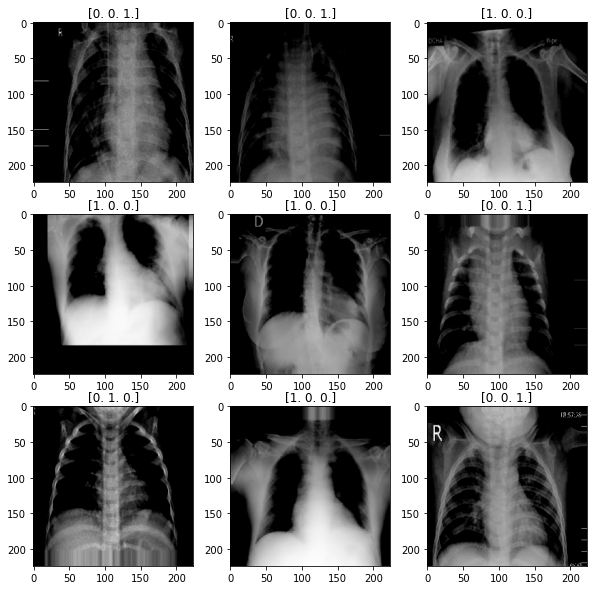

In [21]:
plt.figure(figsize=(10, 10))
batch=next(train_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  img=batch[0][i]
  plt.title(batch[1][i])
  plt.imshow(img)  

# Saved model

In [ ]:
loaded_model = tf.keras.models.load_model(save_model_path)











































































































# predict

In [ ]:
pre_test_df = test_df

In [ ]:
batch_size = 32
nb_samples = test_df.shape[0]

In [ ]:
test_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.xception.preprocess_input).flow_from_dataframe(
    test_df, 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

In [ ]:
predict = loaded_model.predict(test_generator_eval, steps = np.ceil(nb_samples/batch_size))


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
sample_test = test_df.head(18)
sample_test.head()

# Calculate Model Accuracy

In [ ]:
sample_test = test_df
correctPredictions = 0

correctNormalPred = 0
correctCovidPred = 0
correctPneuPred = 0

totalNormalPred = 0
totalCovidPred = 0
totalPneuPred = 0

for index, row in sample_test.iterrows():
    
    filename = row['filename']
    prediction = row['category']
    
    img = load_img( filename, target_size=IMAGE_SIZE)
    
    if 'normal' in filename:
        
        if prediction == 0:
            correctPredictions += 1
            correctNormalPred += 1
            
        totalNormalPred += 1
    
    if 'covid' in filename:
        if prediction == 1: 
            correctPredictions += 1
            correctCovidPred += 1
            
        totalCovidPred += 1
    
    if 'pneumonia' in filename:
        
        if prediction == 2: 
            correctPredictions += 1
            correctPneuPred += 1
            
        totalPneuPred += 1

In [ ]:
print('Model Accuracy:', "{:.2%}".format(correctPredictions / test_df.shape[0]))
print('Correct Predictions:', correctPredictions, 'Total Predictions:', test_df.shape[0])

print('\nNormal Predictions:', correctNormalPred, 'Accuracy', "{:.2%}".format(correctNormalPred /  totalNormalPred))
print('COVID-19 Predictions:', correctCovidPred, 'Accuracy', "{:.2%}".format(correctCovidPred /  totalCovidPred))
print('Viral Pneumonia Predictions:', correctPneuPred, 'Accuracy', "{:.2%}".format(correctPneuPred / totalPneuPred))

In [ ]:
actual = []
pred = []

for row in test_df.iterrows():
    
    filename = row[1][0]
    
    if 'normal' in filename: actual.append(0)
    if 'covid' in filename: actual.append(1)
    if 'pneumonia' in filename: actual.append(2)
        
    pred.append(row[1][1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))  

In [ ]:
confusion_matrix(actual, pred)

# Predict single

In [ ]:
batch_size = 1
nb_samples = 1

In [ ]:
test_file = []
df_file = pd.DataFrame({
    'filename': test_file
})

In [ ]:
df_file

In [ ]:
test_single_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.xception.preprocess_input).flow_from_dataframe(
    df_file, 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

In [ ]:
predict = loaded_model.predict(test_single_gen, steps = np.ceil(nb_samples/batch_size))

In [ ]:
df_file['category'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
df_file['category'] = df_file['category'].replace(label_map)

In [ ]:
# df_file['category'] = df_file['category'].replace({'Normal': 0, 'Covid': 1, 'Pneumonia': 2})

In [ ]:
df_file